In [4]:
import sys
from pathlib import Path
ROOT = Path().resolve().parent.parent

sys.path.append(str(ROOT))

In [5]:
from src.model.data_handler import Dataset

In [6]:
dataset = Dataset(csv_data=ROOT / 'data/rec_data_description.csv', IMAGE_SIZE=(128, 128), include_filter=True)

/Users/luisvalenzuela/Documents/Programs/Memoria/src/preprocess/image_quality_metrics.py:19: RuntimeWarning: invalid value encountered in divide
  data = (data - data.min()) / (data.max() - data.min()) * 255
/Users/luisvalenzuela/Documents/Programs/Memoria/venv_base/lib/python3.10/site-packages/skimage/transform/_warps.py:738: RuntimeWarning: All-NaN slice encountered
  min_val = min_func(input_image)
/Users/luisvalenzuela/Documents/Programs/Memoria/venv_base/lib/python3.10/site-packages/skimage/transform/_warps.py:742: RuntimeWarning: All-NaN slice encountered
  max_val = max_func(input_image)


In [7]:
metrics = ['ssim', 'psnr', 'residual_rms']
dataset.calculate_metrics(metrics=metrics, to_filter=True)

In [8]:
train, val, test, _ = dataset.get_splits(train_ratio=0.70, val_ratio=0.15, test_ratio=0.15, random_state=42, normalize_metrics=False)

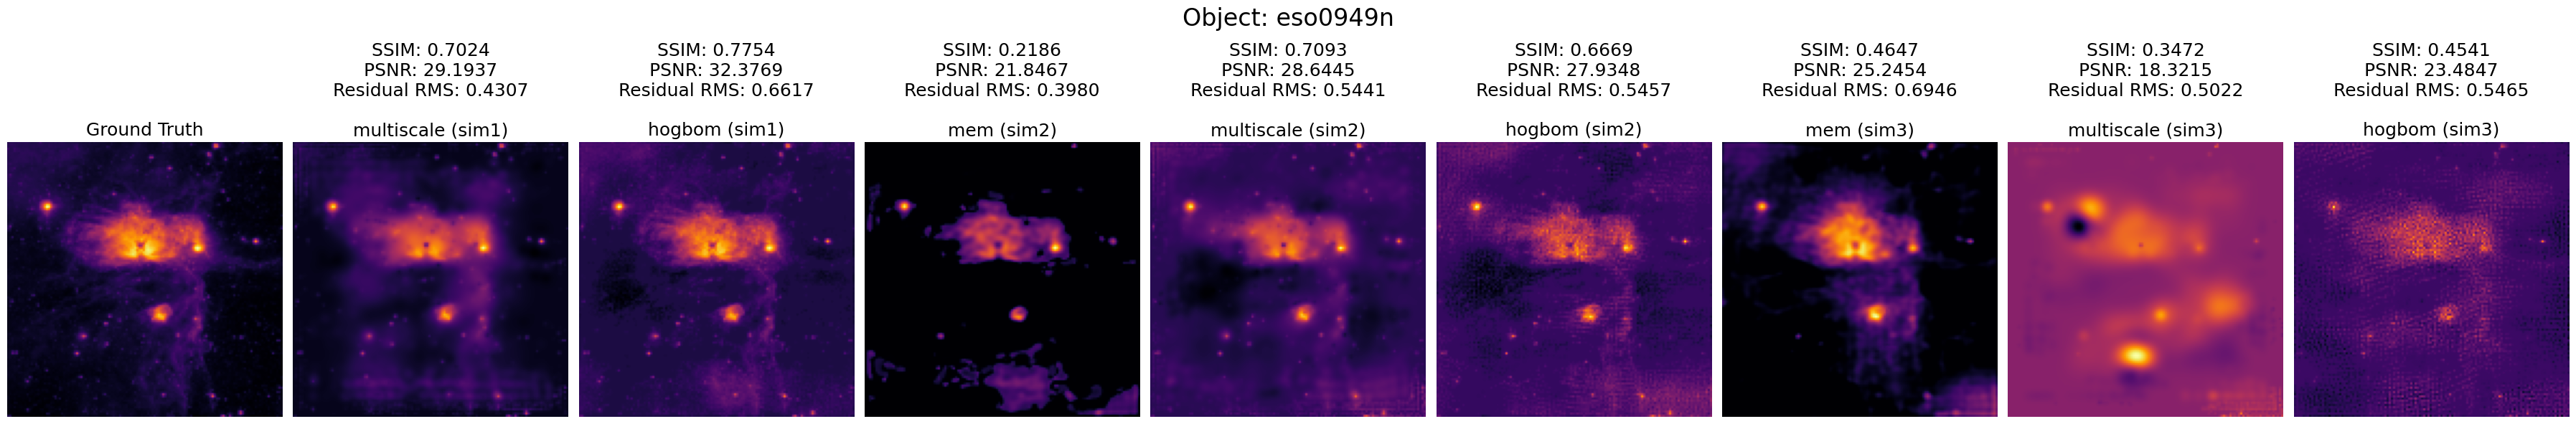

In [10]:
from src.model.utils.plot import plot_set

idx = 10
plot_set(train[idx], include_filtered=False, include_metrics=True)

In [11]:
from src.model.utils.prepare_data import prepare_data_for_model

grouped = True

x_train, y_train = prepare_data_for_model(train, include_filtered=True, grouped=grouped)
x_val, y_val = prepare_data_for_model(val, include_filtered=True, grouped=grouped)
x_test, y_test = prepare_data_for_model(test, include_filtered=True, grouped=grouped)

In [12]:
x_train.shape

(210, 8, 128, 128)